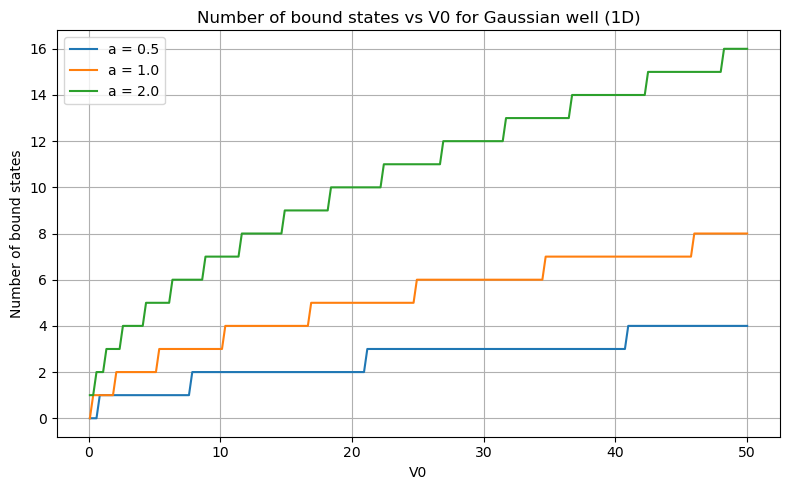

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

def count_bound_states_gaussian(V0, a, L_factor=5.0, N=1000):
    """
    Count bound states for 1D Gaussian well using finite differences.
    Units: ħ^2/(2m) = 1. Domain approximated as [-L, L] with Dirichlet boundaries, where L = L_factor * a.
    """
    L = L_factor * a
    x = np.linspace(-L, L, N)
    dx = x[1] - x[0]
    V = -V0 * np.exp(-x**2/(2 * a**2))
    # Kinetic term: finite difference second derivative
    diag = np.full(N, 2.0 / dx**2) + V
    offdiag = np.full(N-1, -1.0 / dx**2)
    # Compute eigenvalues
    eigvals, _ = eigh_tridiagonal(diag, offdiag, select='a')
    return np.sum(eigvals < 0), eigvals[eigvals < 0]

# Number of bound states vs V0 for selected widths
a_list = [0.5, 1.0, 2.0]
V0_vals = np.linspace(0.1, 50, 200)
plt.figure(figsize=(8, 5))
for a in a_list:
    counts = [count_bound_states_gaussian(V0, a)[0] for V0 in V0_vals]
    plt.plot(V0_vals, counts, label=f'a = {a}')
plt.xlabel('V0')
plt.ylabel('Number of bound states')
plt.title('Number of bound states vs V0 for Gaussian well (1D)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

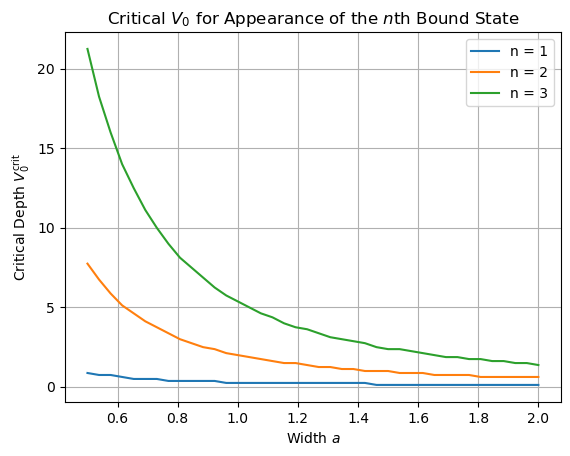

In [ ]:
def count_bound_states_gaussian(V0, a, L_factor=5.0, N=500):
    """
    Count bound states for 1D Gaussian well V(x) using finite differences.
    Units: ħ^2/(2m) = 1. Domain approximated as [-L, L] with Dirichlet boundaries, where L = L_factor * a.
    """
    L = L_factor * a
    x = np.linspace(-L, L, N)
    dx = x[1] - x[0]
    V = -V0 * np.exp(-x**2/(2 * a**2))
    diag = np.full(N, 2.0 / dx**2) + V
    offdiag = np.full(N-1, -1.0 / dx**2)
    eigvals = eigh_tridiagonal(diag, offdiag, select='a', eigvals_only=True)
    return np.sum(eigvals < 0)

a_vals = np.linspace(0.5, 2.0, 40)
V0_vals = np.linspace(0.1, 50, 400)
n_states = [1, 2, 3]

# Compute critical V0 for each n and each a
crit_V0 = {n: [] for n in n_states}
for a in a_vals:
    for n in n_states:
        V0_crit = np.nan
        for V0 in V0_vals:
            if count_bound_states_gaussian(V0, a) >= n:
                V0_crit = V0
                break
        crit_V0[n].append(V0_crit)

plt.figure()
for n in n_states:
    plt.plot(a_vals, crit_V0[n], label=f'n = {n}')
plt.xlabel('Width $a$')
plt.ylabel(r'Critical Depth $V_0^{\mathrm{crit}}$')
plt.title('Critical $V_0$ for Appearance of the $n$th Bound State')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 2. Critical V0 for first bound state vs width a
a_vals = np.linspace(0.2, 3.0, 12)
critical_V0 = []
for a in a_vals:
    # Binary search for minimal V0 giving at least one bound state
    V_low, V_high = 0.01, 100.0
    # Ensure high bound has at least one state
    if count_bound_states_gaussian(V_high, a)[0] < 1:
        critical_V0.append(np.nan)
        continue
    for _ in range(20):
        V_mid = 0.5 * (V_low + V_high)
        if count_bound_states_gaussian(V_mid, a)[0] >= 1:
            V_high = V_mid
        else:
            V_low = V_mid
    critical_V0.append(V_high)

plt.figure(figsize=(8, 5))
plt.plot(a_vals, critical_V0, marker='o')
plt.xlabel('Width a')
plt.ylabel('Critical depth V0 for first bound state')
plt.title('Critical V0 vs Gaussian well width a (1D)')
plt.grid(True)
plt.tight_layout()
plt.show()
